<a href="https://colab.research.google.com/github/primalkriek/stuff/blob/main/02_classification_with_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# chapter 2: neural network classification problem with pytorch

In [3]:
# binary classification -> bv spam or not spam
# multiclass classification -> bv photos of food
# multilabel classification -> multiple different classes, but also perhaps multiple different label

In [4]:
## 1. data
# make classfication data
import sklearn
from sklearn.datasets import make_circles

#make 1000 circles
n_samples = 1000

#create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [5]:
len(X), len(y)

(1000, 1000)

In [6]:
print(f'first 5 samples of X :\n {X[:5]}')
print(f'first 5 samples of y :\n {y[:5]}')

first 5 samples of X :
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
first 5 samples of y :
 [1 1 1 1 0]


In [7]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [8]:
#make a dataframe of circle data
import pandas as pd
circles = pd.DataFrame({'X1':X[:,0],
                        "X2":X[:,1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


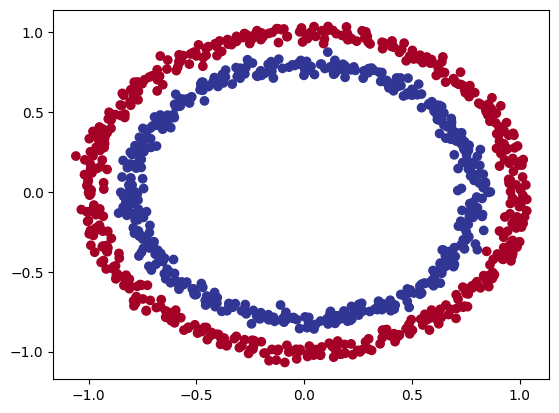

In [9]:
#visualize, visualize, visualize
#import matplotlib
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

In [10]:
# toy datasets:
# scikit-learn.org

In [11]:
### 1.1 check input and output shapes

In [12]:
X.shape, y.shape

((1000, 2), (1000,))

In [13]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [14]:
# view the first examples of features and labels
X_sample = X[0]
y_sample = y[0]

# 2 features of X trying to predict one label of y
print(f'values for one sample of X: {X_sample} and the same for y: {y_sample}')
print(f'shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}')

values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
shapes for one sample of X: (2,) and the same for y: ()


In [15]:
### 1.2 turn data into tensors and create train and test splits

In [16]:
import torch
torch.__version__

'2.1.0+cu118'

In [17]:
X.dtype, type(X), y.dtype

(dtype('float64'), numpy.ndarray, dtype('int64'))

In [18]:

# turn data into tensors
#wanneer je deze runt, daarna als je die nog ns probeert uit te voeren is X en y al van tensor type en krijg je error
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)



In [19]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [20]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [21]:
# 1.2 split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 20% of data set is test 80% training
                                                    random_state=42)

In [22]:
len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

In [23]:
n_samples

1000

## 2. building a model

let's build a model to classify our blue and red dots
to do so we want to:
1. setup device agnostic code so our code will run on an accelorator (GPU) if there is one
2. construct a model
3. define a loss functiino
4. create a training and test loop



In [24]:
import torch
from torch import nn

# make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [25]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

with device agnostic code ready, let's go for a model

1. subclasses 'nn.Module' (almost all model in pytorch subclass 'nn.Module')
2. create 2 'nn.Linear()' layers that are capable of handling the shapes of our data
3. defines forward() method that outlines the forward pass or forward computation of the model class and send it ot the target device


In [26]:
from sklearn import datasets
# construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
#create 2 nn.Linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5) #takes in 2 features and upscales to 5 features
    self.layer_2 = nn.Linear(in_features= 5, out_features=1) #takes the 5 features defined in layer_1 and outputs a signle feature (same shape as y)

# 3. define a forward() method that outlines the forward pass
    def forward(self, x):
      return self.layer_2(self.layer_1(x)) # X -> layer_1 -> layer_2 -> output (X goes into layer 1, then in to layer 2 and then to output



In [27]:
  # 4. instantiate an instance of our model class and send it to the target device
  model_0 = CircleModelV0().to(device)
  model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [28]:
device

'cuda'

In [29]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [30]:
# let's replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [31]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.2026,  0.0455],
                      [ 0.6335, -0.4157],
                      [ 0.1728, -0.5409],
                      [ 0.4540,  0.3353],
                      [ 0.6982,  0.0990]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.0677, -0.2647,  0.5164,  0.5324,  0.1600], device='cuda:0')),
             ('1.weight',
              tensor([[-0.3941, -0.1071,  0.4314,  0.4062,  0.3393]], device='cuda:0')),
             ('1.bias', tensor([-0.0696], device='cuda:0'))])

In [32]:
# make predictions
untrained_preds = model_0(X_test.to(device))
print(f'length of predictions= {len(untrained_preds)}, shape: {untrained_preds.shape}')
print(f'length of test samples= {len(X_test)}, shape: {X_test.shape}')
print(f'first 10 predictions = {untrained_preds[:10]}')
print(f'first 1 labels= {y_test[:10]}')

length of predictions= 200, shape: torch.Size([200, 1])
length of test samples= 200, shape: torch.Size([200, 2])
first 10 predictions = tensor([[0.2096],
        [0.3977],
        [0.0801],
        [0.2448],
        [0.6572],
        [0.7676],
        [0.8398],
        [0.9279],
        [0.0559],
        [0.4167]], device='cuda:0', grad_fn=<SliceBackward0>)
first 1 labels= tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [33]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

from scipy.optimize._lsq.bvls import OptimizeResult
### 2.1 setup loss function and optimizer

which loss function or optimizer shoudl I use?
this is problem specific
for example for regressen you might want MAE of MSE (mean absolute error or mean squared error)
for classification you might want binary cross entropy or categorical cross entropy

and for optimisers two of the most common and useful are SGD and Adam, however pytorcgh has many built)in options

for some choices of loss functions and Optimizer - https://www.learnpytorch.io/02_pytorch_classes.ipynvb
for the losse fucntion we're goint to use torch.nn.BECWithLogitLoss() for more on binary cross https://towardsdatascience.com/understanding-binary-cross-entropy-
for a definition on what a logit is in deep learning: https//stackoverflow.com/a/52111173/7900723
for different optimizers see torch.optim





In [34]:
# setup the loss function
#loss_fn = nn.BCELoss() # BCELoss = requires inputs to have gone through the signmoed
loss_fn = nn.BCEWithLogitsLoss()


optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [35]:
#calculate accuracy
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

## 3. train the model

train our model

1. forward pass
2. calculate the loss
3. optimzer zero grad
4. loss backward (backpropagation)
5. optimizer step (gradient descent)

# 3.1 going from raw logits -> prediction probabilities -> prediction labels

our model outputs are going to be raw **logits**

we can convert these logits into predictions probabilities by passing them to some kind of activation function (eg sigmmoid for binary classification and softmax for multiclass classification)

then we can convert our model's prediction probabilities into prediction labels either by rounding them of taking argums()

In [36]:
# view the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[0.2096],
        [0.3977],
        [0.0801],
        [0.2448],
        [0.6572]], device='cuda:0')

In [37]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [38]:
#use the sigmoid activation function on our model logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5522],
        [0.5981],
        [0.5200],
        [0.5609],
        [0.6586]], device='cuda:0')

In [39]:
torch.round(y_pred_probs)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], device='cuda:0')

for our prediction probability values, we need to perform a range style rounding on them
* y_pred_probs >=0.5, y=1(class 1)
* y_pred_probs >0.5, y=0 (class 0)

In [40]:
# find predicted labels
y_preds = torch.round(y_pred_probs)

# in full (logits -> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))
# check equality
print (torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 1., 1., 1.], device='cuda:0')

In [41]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [42]:
### 3.2 building training and test loop
# let's write a training loop
torch.cuda.manual_seed(42)
epochs = 100

#put data on device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range (epochs):
  model_0.train()
# forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
# calculate the loss/accuracy
  loss = loss_fn(y_logits,
                 y_train)
  loss = loss_fn(y_logits,
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
# optimizer zero grad
  optimizer.zero_grad()
# perform backpropagation (back propagation)
  loss.backward()
# optimizer step (gradient descent)
  optimizer.step()
# testing
  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
# calculate the test loss/acc
  test_loss = loss_fn(test_logits,
                      y_test)
  test_acc = accuracy_fn(y_true=y_test,
                        y_pred = test_pred )
#print out what is happening
  if epoch % 10 ==0:
    print(f"epoch: {epoch} - Loss: {loss:.5f}, Acc: {acc:.2f}% - Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

epoch: 0 - Loss: 0.72730, Acc: 59.38% - Test Loss: 0.72926, Test Acc: 55.00%
epoch: 10 - Loss: 0.70808, Acc: 52.88% - Test Loss: 0.71140, Test Acc: 50.50%
epoch: 20 - Loss: 0.70084, Acc: 51.75% - Test Loss: 0.70437, Test Acc: 50.50%
epoch: 30 - Loss: 0.69766, Acc: 51.25% - Test Loss: 0.70110, Test Acc: 50.50%
epoch: 40 - Loss: 0.69603, Acc: 51.12% - Test Loss: 0.69931, Test Acc: 51.00%
epoch: 50 - Loss: 0.69509, Acc: 50.88% - Test Loss: 0.69820, Test Acc: 49.50%
epoch: 60 - Loss: 0.69449, Acc: 51.00% - Test Loss: 0.69745, Test Acc: 49.00%
epoch: 70 - Loss: 0.69408, Acc: 50.62% - Test Loss: 0.69690, Test Acc: 48.50%
epoch: 80 - Loss: 0.69379, Acc: 50.88% - Test Loss: 0.69649, Test Acc: 49.00%
epoch: 90 - Loss: 0.69358, Acc: 50.62% - Test Loss: 0.69617, Test Acc: 48.50%


# 4 make the predictions and evaluate the model

from the metrics it looks like our models isn't learning anything
so to inscpect it let's make some mredictions and make them visual
 let's plot_decision_boundary()

In [43]:
import requests
from pathlib import Path

#download helper functions from learn pytorch repo

if Path("helper_functions.py").is_file():
  print("helper functions are already downloaded")
else:
  print ("download helper functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

download helper functions.py


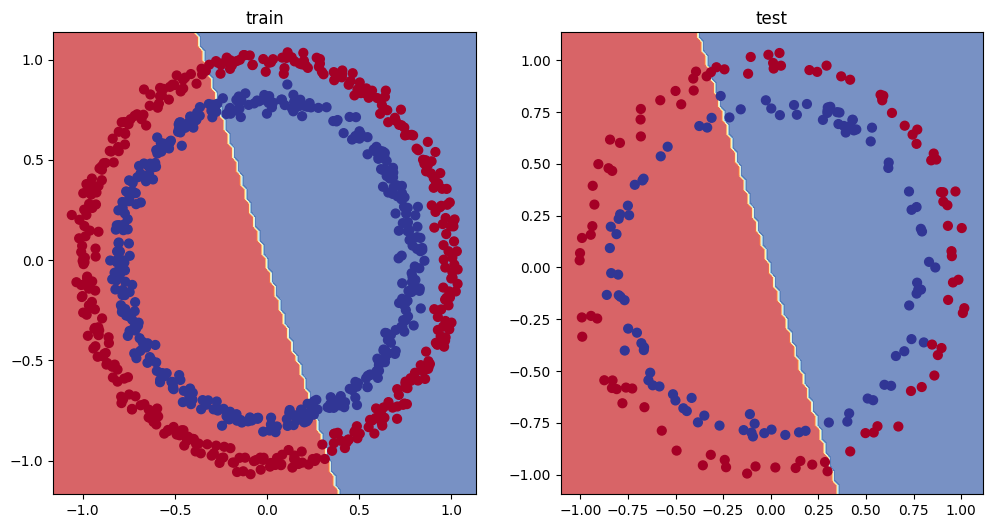

In [44]:
# plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_0, X_test, y_test)

from IPython.core.inputtransformer2 import find_end_of_continued_line
## 5. improving a model (from a model perspective)

* add more layers (give the model more chances to learn about patterns in the data)
* add more hidden unites (go from 5 unites to 10 hidden units)
* fit for longer
* changing the activation function
* change the learning rate
* change the loss function

these options are from our model's perspective because they deal directly with the model and not with the data

these values are named **hyperparameters** because these are changed by ML engineers and data scientists

In [45]:
#this class increases number of hidden units
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features= 2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    #z = self.layer_1(x)
    #z = self.layer_2(z)
    #z = self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x))) # this gives speedups


In [46]:
model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [47]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.3080,  0.5471],
                      [ 0.6464,  0.6832],
                      [ 0.3761,  0.2739],
                      [-0.6638, -0.1596],
                      [ 0.6714, -0.0389],
                      [-0.0371,  0.0025],
                      [-0.0789,  0.3449],
                      [-0.4236, -0.3459],
                      [ 0.1993,  0.6017],
                      [-0.2744,  0.2164]], device='cuda:0')),
             ('layer_1.bias',
              tensor([ 0.4546, -0.2947,  0.6795, -0.3828, -0.5541, -0.2896,  0.5814,  0.6987,
                       0.3696, -0.0018], device='cuda:0')),
             ('layer_2.weight',
              tensor([[-0.0706, -0.0608,  0.2075,  0.1570, -0.1120,  0.0382, -0.1701,  0.2636,
                       -0.2275, -0.2873],
                      [ 0.1924, -0.2374, -0.2498, -0.0762, -0.2733, -0.0275,  0.2334, -0.1852,
                        0.1142,  0.1863],
                      [ 0.2593, -0.174

In [48]:
from torch.nn.modules.loss import BCEWithLogitsLoss
# create a loss function
loss_fn = nn.BCEWithLogitsLoss()
#create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [49]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

In [50]:
# train for longer
epochs = 1000

# create a training loop
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_1.train()
#forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
#calculate loss
  loss= loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true = y_train,
                    y_pred=y_pred)
# optimize
  optimizer.zero_grad()
#backpropagation
  loss.backward()

  optimizer.step()

  model_1.eval()
  with torch.inference_mode():

    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

    if epoch %100 ==0:
      print(f'Epoch: {epoch} - loss: {loss:.5f} - acc: {acc:.2f}% - test loss: {test_loss:.5f} - test acc: {test_acc:.2f}%')

Epoch: 0 - loss: 0.70268 - acc: 48.75% - test loss: 0.69656 - test acc: 45.00%
Epoch: 100 - loss: 0.69334 - acc: 50.62% - test loss: 0.69294 - test acc: 49.00%
Epoch: 200 - loss: 0.69305 - acc: 50.75% - test loss: 0.69407 - test acc: 47.50%
Epoch: 300 - loss: 0.69300 - acc: 50.75% - test loss: 0.69444 - test acc: 47.00%
Epoch: 400 - loss: 0.69298 - acc: 51.38% - test loss: 0.69457 - test acc: 47.00%
Epoch: 500 - loss: 0.69298 - acc: 51.50% - test loss: 0.69463 - test acc: 45.50%
Epoch: 600 - loss: 0.69298 - acc: 51.25% - test loss: 0.69465 - test acc: 45.50%
Epoch: 700 - loss: 0.69298 - acc: 51.38% - test loss: 0.69467 - test acc: 45.50%
Epoch: 800 - loss: 0.69298 - acc: 51.25% - test loss: 0.69467 - test acc: 46.00%
Epoch: 900 - loss: 0.69298 - acc: 51.12% - test loss: 0.69468 - test acc: 46.00%


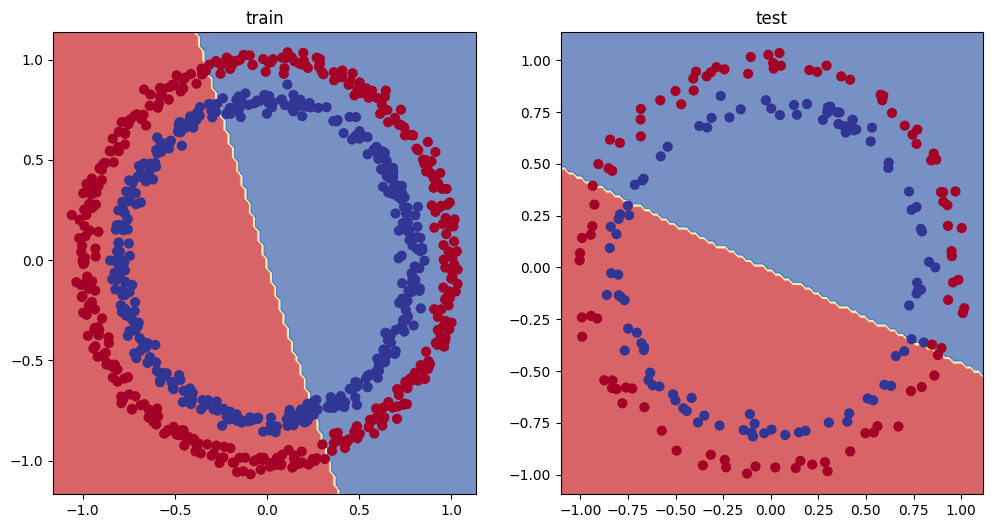

In [51]:
# plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_1, X_test, y_test)

### 5.1 preparing data to see if our model can fit a straight line

one way is to troubleshoot to a larger problem is to test out a smaller problem


In [52]:
# create some data (same as notebook 01)

weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

X_regression = torch.arange (start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression +bias
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [53]:
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

len(X_train_regression), len(y_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

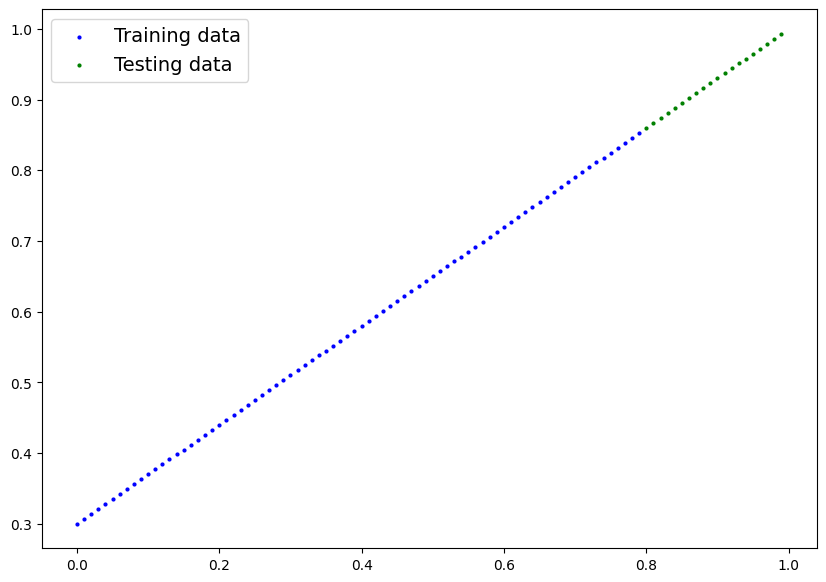

In [54]:
plot_predictions(train_data=X_train_regression,
                 train_labels= y_train_regression,
                 test_data = X_test_regression,
                 test_labels= y_test_regression)

### 5.3 adjusting model one to fit a straight line


In [55]:
# same archtitecture as model_1 (but using nn.Sequential())
model_2 = nn.Sequential(
    nn.Linear(in_features= 1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [56]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.01)

In [57]:
torch.manual_seed(42)

epochs= 1000

X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

In [58]:
for epoch in range(epochs):
  y_pred= model_2(X_train_regression)
  loss=loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  if epoch %100 ==0:
      print(f'Epoch: {epoch} - loss: {loss:.5f} - test loss: {test_loss:.5f}')

Epoch: 0 - loss: 0.75986 - test loss: 0.91103
Epoch: 100 - loss: 0.02858 - test loss: 0.00081
Epoch: 200 - loss: 0.02533 - test loss: 0.00209
Epoch: 300 - loss: 0.02137 - test loss: 0.00305
Epoch: 400 - loss: 0.01964 - test loss: 0.00341
Epoch: 500 - loss: 0.01940 - test loss: 0.00387
Epoch: 600 - loss: 0.01903 - test loss: 0.00379
Epoch: 700 - loss: 0.01878 - test loss: 0.00381
Epoch: 800 - loss: 0.01840 - test loss: 0.00329
Epoch: 900 - loss: 0.01798 - test loss: 0.00360


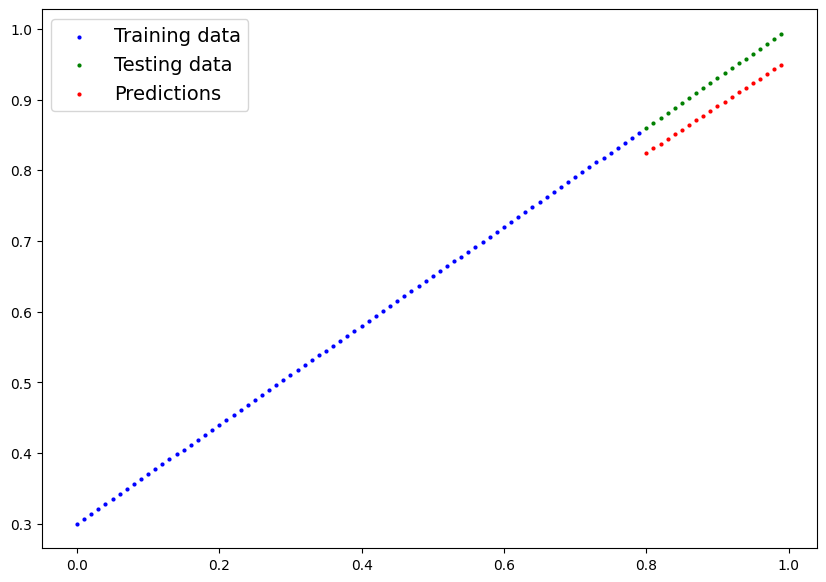

In [59]:
model_2.eval()
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data= X_test_regression.cpu(),
                 test_labels = y_test_regression.cpu(),
                 predictions=y_preds.cpu())

## 6 the missing piece: non-linearity

what patterns could you draw if you were given an ifinate amoutn of straight and non straight lines



### 6.1 recreating non linear data (red and blue circles@)

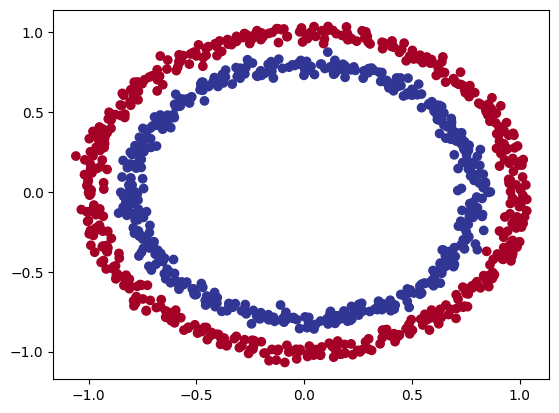

In [60]:
#make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000
X, y = make_circles(n_samples,
                     noise= 0.03,
                     random_state = 42)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [61]:
# convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

#turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
#split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2  building with non linearity
* linear = straight line
* non linear = non straight lines aka curves

artificial neual networks are a large combination of

In [62]:
# build a model with non linear activation functions
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu= nn.ReLU() #relu is non linear activation function

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

In [63]:
model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [64]:
#setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),
                            lr=0.1)

###6.3 training a model with non linearity

In [65]:
 len(X_test), test_logits.shape, y_test.shape

(200, torch.Size([200]), torch.Size([200]))

In [66]:
#training a model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# put all data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epoch = 1000

for epoch in range(epochs):
#train
  model_3.train()
#forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))
#calculate the loss
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true = y_train,
                    y_pred= y_pred)
#optimze the zero grad
  optimizer.zero_grad()
#loss backward
  loss.backward()
#step the optimizer
  optimizer.step()

  ###testing
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)
  if epoch % 100 == 0:
    print(f"opoch: {epoch}, Loss: {loss:.4f}, acc: {acc: .2f}%, test_loss: {test_loss: .4f}; test_acc: {test_acc: 2f}%")

opoch: 0, Loss: 0.6929, acc:  50.00%, test_loss:  0.6932; test_acc:  50.000000%
opoch: 100, Loss: 0.6912, acc:  52.88%, test_loss:  0.6910; test_acc:  52.500000%
opoch: 200, Loss: 0.6898, acc:  53.37%, test_loss:  0.6894; test_acc:  55.000000%
opoch: 300, Loss: 0.6879, acc:  53.00%, test_loss:  0.6872; test_acc:  56.000000%
opoch: 400, Loss: 0.6852, acc:  52.75%, test_loss:  0.6841; test_acc:  56.500000%
opoch: 500, Loss: 0.6810, acc:  52.75%, test_loss:  0.6794; test_acc:  56.500000%
opoch: 600, Loss: 0.6751, acc:  54.50%, test_loss:  0.6729; test_acc:  56.000000%
opoch: 700, Loss: 0.6666, acc:  58.38%, test_loss:  0.6632; test_acc:  59.000000%
opoch: 800, Loss: 0.6516, acc:  64.00%, test_loss:  0.6476; test_acc:  67.500000%
opoch: 900, Loss: 0.6236, acc:  74.00%, test_loss:  0.6215; test_acc:  79.000000%


### 6.4 evaluate the model wuith non linear activation functions

In [67]:
#make predictions
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

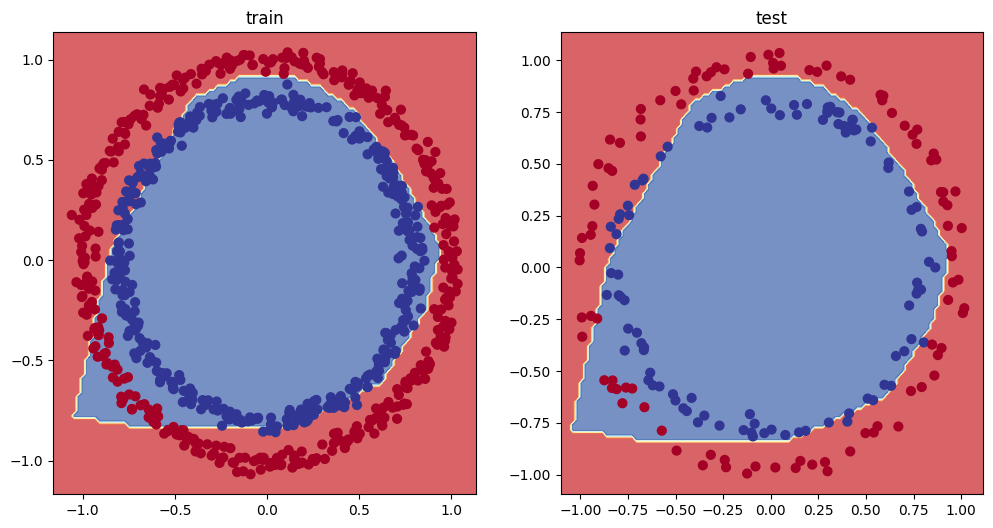

In [70]:
#plot decision boundaries
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2, 2)
plt.title("test")
plot_decision_boundary(model_3, X_test, y_test)

## 7. replication non-linear activation functions

neural networks, rather then us telling the tools what to learn, we give it the tools to discover the patterns in the data and it tries to figure out the patterns on its own

and these tools are linear and non linear functions

In [71]:
# create a tensor
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A.dtype

torch.float32

In [72]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

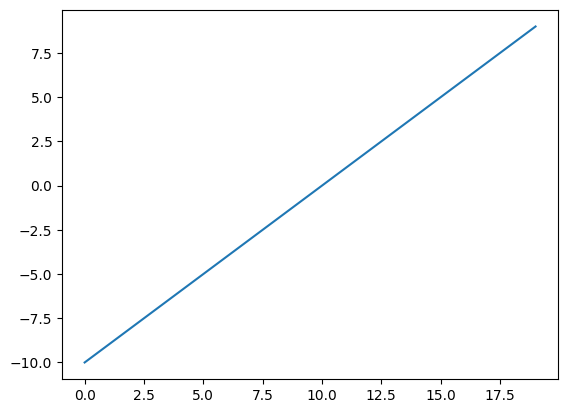

In [73]:
#visualize the tensor
plt.plot(A)

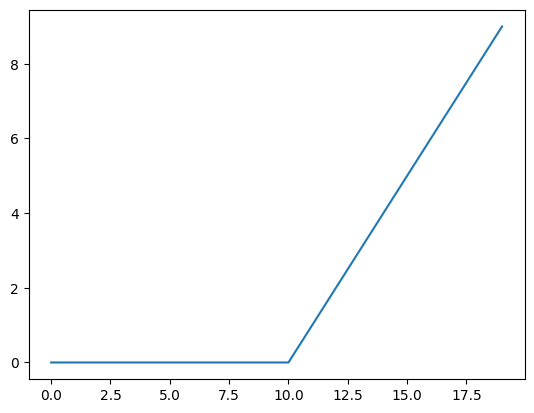

In [74]:
plt.plot(torch.relu(A))

In [75]:
def relu(x):
  return torch.maximum(torch.tensor(0), x) #input must be tensiors

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

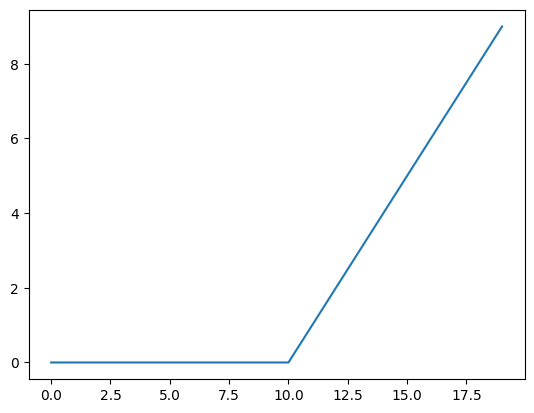

In [76]:
#plot relu activation function
plt.plot(relu(A))

In [77]:
#let's do the same for sigmoid
def sigmoid(x):
  return 1/ (1+torch.exp(-x))

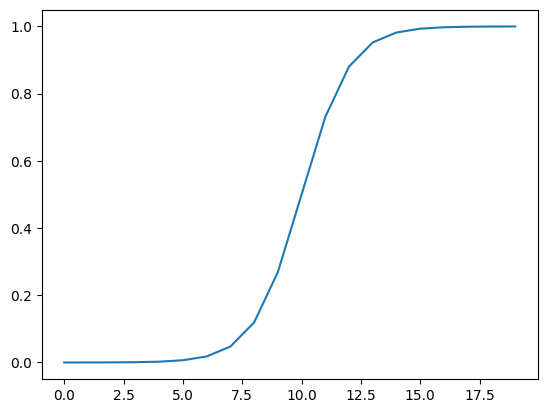

In [78]:
plt.plot(sigmoid(A))

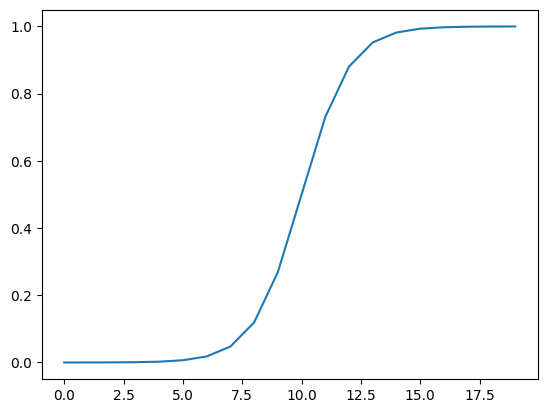

In [79]:
plt.plot(torch.sigmoid(A))

### 8 putting it all together with multiclass classification
* binary class = on thing or another (cat vs dog, spam not spam)
* multiclass = more than ont thing (vat vs dog vs chicken)

### 8.1 creating a toy multiclass dataset

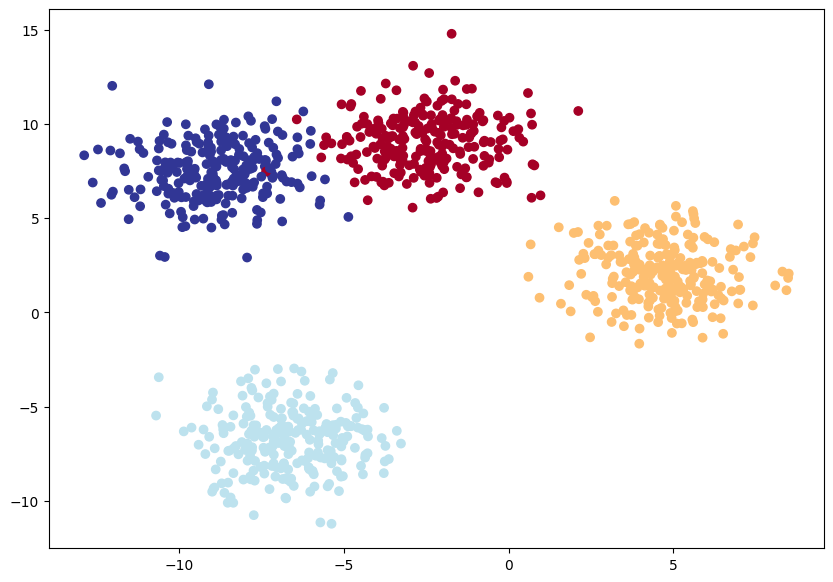

In [80]:
#import dependencies
import torch
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

#create multiclass data
X_blob, y_blob = make_blobs(n_samples= 1000,
                            n_features=NUM_FEATURES,
                            centers= NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)
#turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.float)

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob,
                                                                        test_size=0.2,
                                                                        random_state= RANDOM_SEED)

plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)

### 8.2 building a multiclass classification model in python

In [81]:
# create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [95]:
#builing a multi-class classifictation model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units = 8):
    """Initializes multi-class classification model

    Args:
    input_features (int): number of input features to the model
    output_features (int): number of output features (number of output classes)
    hidden_units (int): number of hidden unites between layers, default is 8

    returns:

    example:
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )
  def forward(self, x):
    return self.linear_layer_stack(x)




In [96]:
  #create an instance of blobmodel and send it to target device
  model_4 = BlobModel(input_features= 2,
                      output_features=4,
                      hidden_units=8).to(device)

model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): ReLU()
    (3): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [83]:
X_blob_train.shape, y_blob_train[:5]

(torch.Size([800, 2]), tensor([1., 0., 2., 2., 0.]))

In [84]:
torch.unique(y_blob_train)

tensor([0., 1., 2., 3.])

### create a loss function and optimizer for multiclass classification

In [93]:
# create a loss function
loss_fn = nn.CrossEntropyLoss()
# create a optimizer
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1) #learning rate is a hyperparameter that can be changed

###8.4 getting prediction probabilities for a multi-class pytorch model

in order to evaluate, train and test our model, we need to convert our model's outputs (logits) to prediction probabilities and then predication labels


In [98]:
#let's get some raw outputs of our model (logits)
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))
y_logits[:10]

tensor([[ 6.3314e-01, -1.2287e+00, -3.9354e-01, -4.7488e-02],
        [ 3.5144e-01, -2.3997e+00, -1.3775e-01, -1.4238e+00],
        [-2.2722e-01, -9.4482e-01,  1.7114e-01, -1.0999e+00],
        [ 4.8997e-01, -7.1404e-01, -2.1762e-01,  1.0653e-01],
        [ 6.8194e-01, -2.5295e+00, -5.3923e-01, -9.2107e-01],
        [ 3.4474e-01, -2.7050e+00, -1.6771e-01, -1.6432e+00],
        [-2.4684e-03, -9.5544e-01,  1.7762e-02, -9.2444e-01],
        [ 5.8539e-01, -2.4411e+00, -4.1570e-01, -1.0336e+00],
        [-4.9031e-01, -1.0822e+00,  1.3282e-01, -1.2503e+00],
        [ 6.1454e-01, -2.4374e+00, -4.4924e-01, -9.7902e-01]], device='cuda:0')

In [99]:
y_blob_test[:10]

tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0.])

In [101]:
# convert our models logits outpus to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[ 0.6331, -1.2287, -0.3935, -0.0475],
        [ 0.3514, -2.3997, -0.1378, -1.4238],
        [-0.2272, -0.9448,  0.1711, -1.0999],
        [ 0.4900, -0.7140, -0.2176,  0.1065],
        [ 0.6819, -2.5295, -0.5392, -0.9211]], device='cuda:0')
tensor([[0.4951, 0.0769, 0.1773, 0.2507],
        [0.5416, 0.0346, 0.3321, 0.0918],
        [0.2945, 0.1437, 0.4387, 0.1231],
        [0.4041, 0.1212, 0.1992, 0.2754],
        [0.6508, 0.0262, 0.1919, 0.1310]], device='cuda:0')


In [104]:
torch.sum(y_pred_probs[0])

tensor(1., device='cuda:0')

In [105]:
torch.max(y_pred_probs[0])

tensor(0.4951, device='cuda:0')

In [106]:
torch.argmax(y_pred_probs[0])

tensor(0, device='cuda:0')

In [108]:
#convert our model prediction probability to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2,
        2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2,
        2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
        2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0,
        2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0,
        0, 0, 2, 0, 0, 0, 2, 0], device='cuda:0')

In [109]:
y_blob_test

tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0., 0., 1., 0., 0., 0., 3., 3., 2.,
        3., 3., 3., 0., 1., 2., 2., 2., 3., 0., 1., 0., 3., 1., 1., 3., 1., 2.,
        1., 3., 0., 2., 0., 3., 3., 2., 0., 3., 1., 1., 0., 3., 1., 0., 1., 1.,
        3., 2., 1., 1., 3., 2., 2., 0., 3., 2., 2., 0., 0., 3., 3., 0., 0., 3.,
        3., 3., 2., 3., 3., 3., 3., 1., 0., 2., 3., 2., 3., 3., 2., 3., 3., 2.,
        3., 3., 1., 3., 3., 3., 1., 0., 3., 2., 0., 0., 3., 0., 2., 3., 1., 0.,
        3., 2., 1., 1., 0., 2., 2., 3., 0., 0., 1., 2., 2., 3., 0., 1., 2., 0.,
        0., 0., 2., 3., 1., 2., 3., 2., 0., 3., 0., 0., 1., 1., 1., 0., 2., 2.,
        2., 2., 0., 3., 3., 2., 2., 1., 3., 2., 0., 0., 3., 3., 2., 1., 2., 0.,
        3., 2., 0., 3., 2., 0., 2., 2., 2., 0., 3., 1., 1., 1., 1., 1., 3., 1.,
        0., 2., 2., 1., 2., 2., 0., 1., 2., 2., 0., 0., 1., 3., 2., 0., 3., 1.,
        2., 1.])

In [102]:
model_4(X_blob_test)

RuntimeError: ignored

### 8.5 build a training loop